# Basic Example:

This is just a quick example of plotting a number of BigWig files using the package API

### Imports

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotnado.api as pn
import numpy as np

## Define the BigWig files that we want to plot

**Note**: The BigWig files are not included in the dataset, as it is possible to just use remote URLs to plot the data I'm going to use data stored on the CCB Oxford HPC.

To make life easier I'm going to make a dictionary of the BigWig files that I want to plot. You could just add these one by one to the plot if you wanted to.

In [18]:
bigwigs = {
    'MV4;11 0nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4110nMH3K79me2_bigWig.bigWig',
    'MV4;11 0.5nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV41105nMH3K79me2_bigWig.bigWig',
    'MV4;11 2nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4112nMH3K79me2_bigWig.bigWig',
    'MV4;11 5nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4115nMH3K79me2_bigWig.bigWig',
}

# Generate the plot

I'm going to make a basic plot with:

* scale bar
* gene annotations
* 4 x BigWig files
* X-axis showing the chromosome coordinates

In [19]:
figure = pn.Figure(autocolor=True, autospacing=True) # Create a figure instance, autocolor and autospacing are optional arguments but make the figure look nicer
figure.add_track('scale') # Add a scale track

figure.add_track('genes', 
                 file='hg38_genes.bed', 
                 gene_style="normal", # 'normal' or 'flybase' - I much prefer 'normal'
                 min_gene_length=int(1.2e5), # Minimum gene length to plot, useful to filter out small genes that often clutter the plot
                 height=0.5, # Height of the track - setting this to 0.5 makes the gene track look nicer
                 label_y_offset=-50,
                 label_loc="mid",
                 arrow_color="black")


# Loop over the bigwigs and add them to the figure
for name, url in bigwigs.items():
    figure.add_track('bigwig', # Track type 
                     file=url, # File or URL to the bigwig file 
                     title=name, # Title of the track 
                     style='stairsfilled', # Style of the track, can be 'line', 'fill', 'stairs', 'stairsfilled', 'hist', or None
                     autoscale_group='H3K79me2', # (Optional) Autoscale group to scale the tracks together,
                     min_value=0, # (Optional) Minimum value for the track
                     )

figure.add_track('xaxis') # Add an x-axis track

sort: cannot create temporary file in '/var/scratch/cchahrou/2699202/': No such file or directory


# Display the plot

You've got multiple options for displaying the plot:

* Display it in a Jupyter notebook
* Save it to a file
* Save it as a template for later use or plotting using the CLI

## Define the region to plot

There are two ways to define the region to plot:

1. Use a set of genomic coordinates
1. Use a gene name (this must be from a genome that is supported by the package)

In [20]:
region_to_plot = 'chr9:77,620,642-78,119,542' # Define the region to plot, this is a region around the GNAQ gene
gene_to_plot = 'GNAQ' # Define the gene to plot, this is the GNAQ gene

### Perform the plotting

### By Region

In [ ]:
figure.plot(region_to_plot) # Plot the region

### By Gene

2025-01-27 17:05:11.928 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 3328.83395599834 bp
2025-01-27 17:05:11.946 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


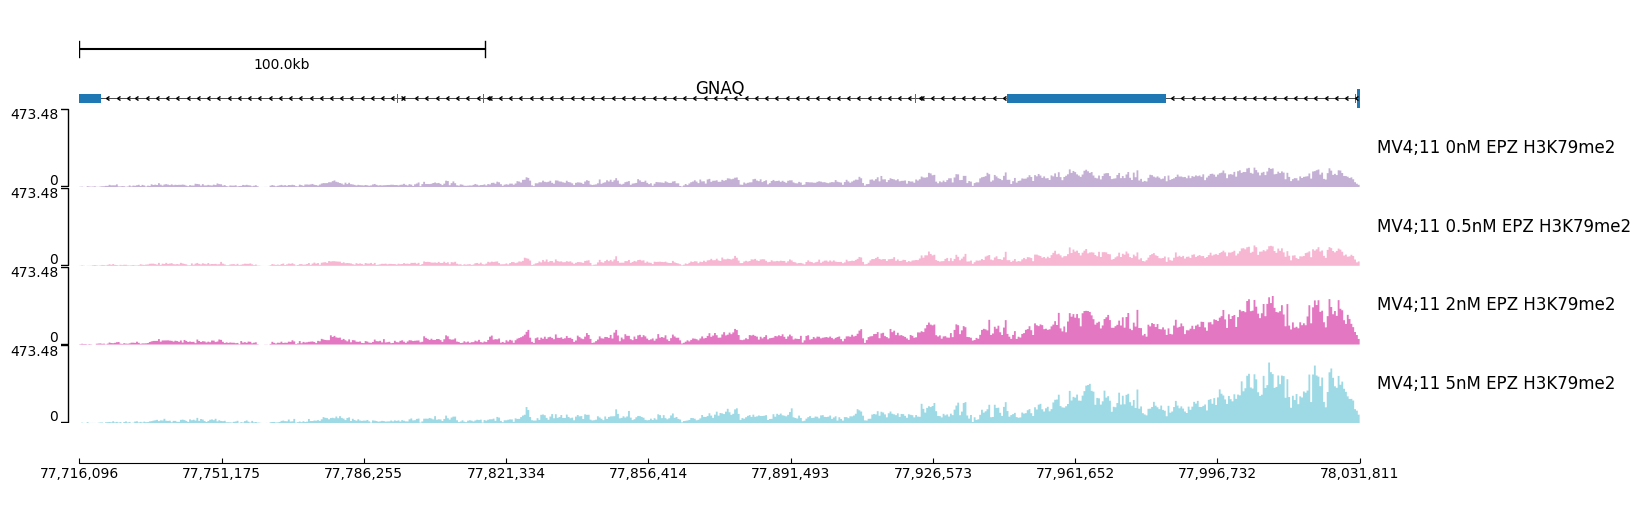

In [7]:
figure.plot_gene('GNAQ', genome='hg38') # Plot the gene

## Save the plot

In [8]:
figure.save(gr=region_to_plot, # The region to plot
            output='GNAQ_H3K79me2.png', # The output file name, the file format is inferred from the extension
            )

2025-01-27 17:05:13.920 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 5260.298879202989 bp
2025-01-27 17:05:13.942 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


### Examine the saved plot

![Basic Example](./GNAQ_H3K79me2.png)

## Save the plot as a template

This is useful if you want to use the same plot settings for multiple plots, it also allows you to edit the plot settings with standard text editors and then you can either use the PlotNado CLI to generate the plot or you can read in the template and plot it again using the API.

In [9]:
figure.to_toml('H3K79me2.toml')

sort: cannot create temporary file in '/var/scratch/cchahrou/2699202/': No such file or directory


### Examine the template

The tempate is a TOML file that contains all the settings for the plot, you can edit this file with a text editor and then use the PlotNado CLI to generate the plot.

```{toml}
[spacer]
track_type = "spacer"
height = 0.1

[scale]
track_type = "scale"

["spacer 1"]
track_type = "spacer"
height = 0.1

[genes]
track_type = "genes"
genome = "hg38"
gene_style = "normal"
min_gene_length = 100000.0
height = 0.5

["spacer 2"]
track_type = "spacer"
height = 0.1

["MV4;11 0nM EPZ H3K79me2"]
track_type = "bigwig"
file = "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4110nMH3K79me2_bigWig.bigWig"
title = "MV4;11 0nM EPZ H3K79me2"
style = "stairsfilled"
autoscale_group = "H3K79me2"
min_value = 0

["spacer 3"]
track_type = "spacer"
height = 0.1

["MV4;11 0.5nM EPZ H3K79me2"]
track_type = "bigwig"
file = "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV41105nMH3K79me2_bigWig.bigWig"
title = "MV4;11 0.5nM EPZ H3K79me2"
style = "stairsfilled"
autoscale_group = "H3K79me2"
min_value = 0

["spacer 4"]
track_type = "spacer"
height = 0.1

["MV4;11 2nM EPZ H3K79me2"]
track_type = "bigwig"
file = "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4112nMH3K79me2_bigWig.bigWig"
title = "MV4;11 2nM EPZ H3K79me2"
style = "stairsfilled"
autoscale_group = "H3K79me2"
min_value = 0

["spacer 5"]
track_type = "spacer"
height = 0.1

["MV4;11 5nM EPZ H3K79me2"]
track_type = "bigwig"
file = "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4115nMH3K79me2_bigWig.bigWig"
title = "MV4;11 5nM EPZ H3K79me2"
style = "stairsfilled"
autoscale_group = "H3K79me2"
min_value = 0

["spacer 6"]
track_type = "spacer"
height = 0.1

[xaxis]
track_type = "xaxis"
```

## Re-load the template and plot it

**Note**: In the original plot I took advantage of the 'autocolor' feature of the package, this will automatically assign a color to each track, these colors are not saved in the template. You can either add them manually or you can use the 'autocolor' option again when you load the template.

sort: cannot create temporary file in '/var/scratch/cchahrou/2699202/': No such file or directory
2025-01-27 17:05:16.516 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 5260.298879202989 bp
2025-01-27 17:05:16.554 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


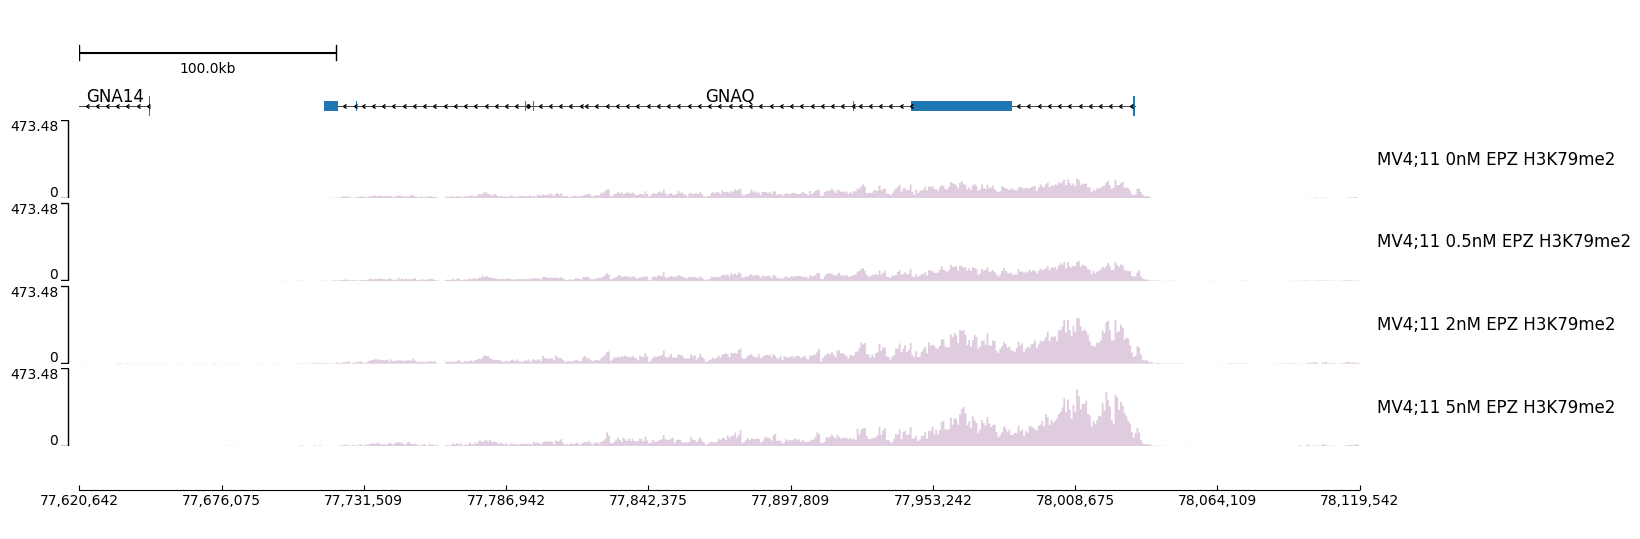

In [10]:
new_figure = pn.Figure.from_toml('H3K79me2.toml')
new_figure.plot(region_to_plot)

## CLI replotting

You can use the CLI to replot the template, this is useful if you want to make a number of plots with the same settings.

```bash
```



# Customizing the plot

While it's possible to customize the figure after it's been generated, it's far easier to customize the tracks while you are adding them to the figure. Alternatively, you can save the plot as a template and then edit the template file with a text editor.

I'm going to run through a few examples of customizing the plot:

1. Changing the color of the tracks
1. Changing the y-axis style
1. Changing the style of the BigWig tracks

sort: cannot create temporary file in '/var/scratch/cchahrou/2699202/': No such file or directory
2025-01-27 17:06:38.624 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 3328.83395599834 bp
2025-01-27 17:06:38.641 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


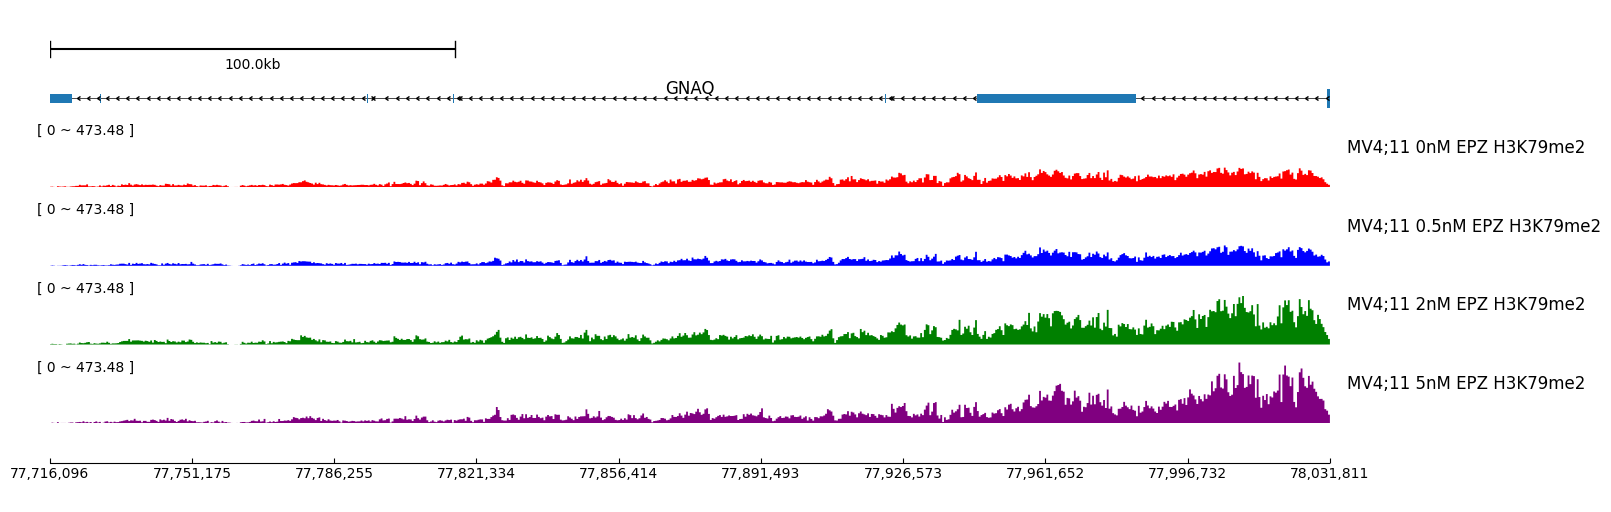

In [ ]:
figure = pn.Figure(autospacing=True)
figure.add_track('scale')

figure.add_track('genes', 
                 file='hg38_genes.bed', 
                 gene_style="normal", # 'normal' or 'flybase' - I much prefer 'normal'
                 min_gene_length=int(1.2e5), # Minimum gene length to plot, useful to filter out small genes that often clutter the plot
                 height=0.5, # Height of the track - setting this to 0.5 makes the gene track look nicer
                 label_y_offset=-50,
                 label_loc="mid",
                 arrow_color="black")


# Define the colours for the bigwigs
bigwig_colours = {
    'MV4;11 0nM EPZ H3K79me2': 'red',
    'MV4;11 0.5nM EPZ H3K79me2': 'blue',
    'MV4;11 2nM EPZ H3K79me2': 'green',
    'MV4;11 5nM EPZ H3K79me2': 'purple',
}

# Loop over the bigwigs and add them to the figure
for name, url in bigwigs.items():
    figure.add_track('bigwig', 
                     file=url, 
                     title=name, 
                     style='stairsfilled', 
                     color=bigwig_colours[name], # Set the colour of the track using the bigwig_colours dictionary
                     autoscale_group='H3K79me2', 
                     min_value=0,
                     data_range_style='text', # Display the data range as text rather than a bar
                     )

figure.add_track('xaxis')

figure.plot_gene('GNAQ', genome='hg38')

### Changing the style of the BigWig tracks

sort: cannot create temporary file in '/var/scratch/cchahrou/2699202/': No such file or directory
2025-01-27 17:06:50.027 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 3328.83395599834 bp
2025-01-27 17:06:50.042 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


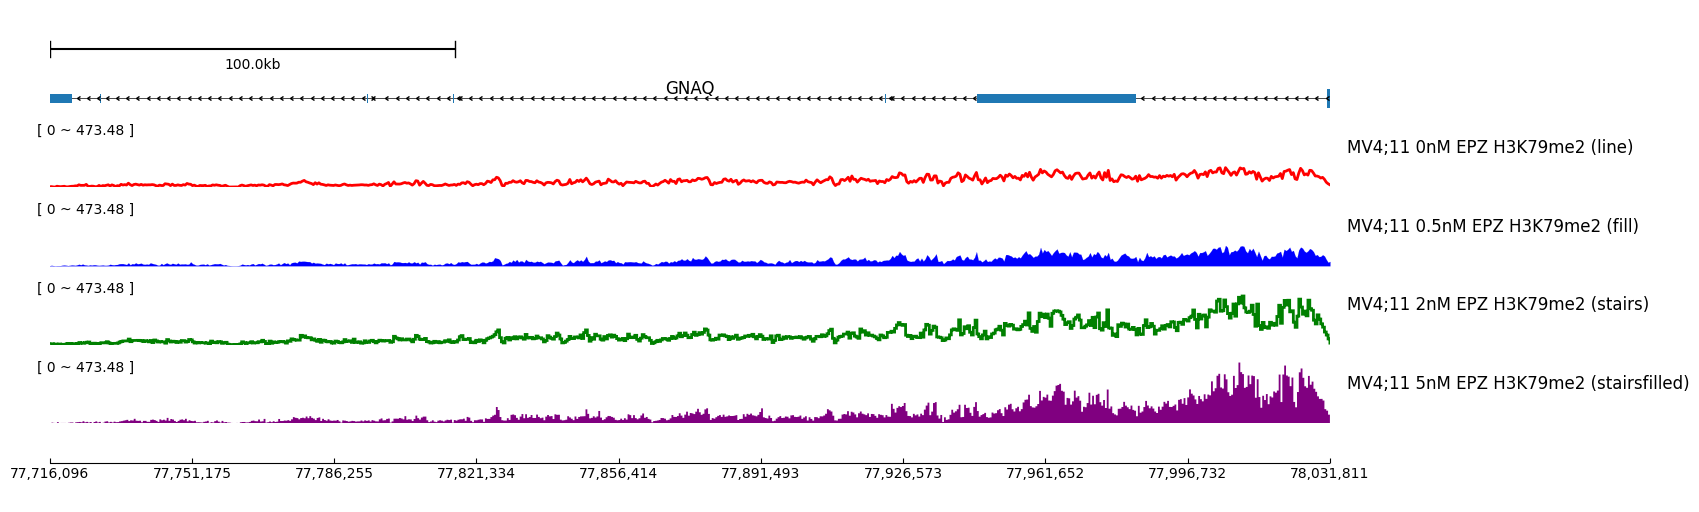

In [ ]:
figure = pn.Figure(autospacing=True)
figure.add_track('scale')

figure.add_track('genes', 
                 file='hg38_genes.bed', 
                 gene_style="normal", # 'normal' or 'flybase' - I much prefer 'normal'
                 min_gene_length=int(1.2e5), # Minimum gene length to plot, useful to filter out small genes that often clutter the plot
                 height=0.5, # Height of the track - setting this to 0.5 makes the gene track look nicer
                 label_y_offset=-50,
                 label_loc="mid",
                 arrow_color="black")


# Define the colours for the bigwigs
bigwig_colours = {
    'MV4;11 0nM EPZ H3K79me2': 'red',
    'MV4;11 0.5nM EPZ H3K79me2': 'blue',
    'MV4;11 2nM EPZ H3K79me2': 'green',
    'MV4;11 5nM EPZ H3K79me2': 'purple',
}

styles = ['line', 'fill', 'stairs', 'stairsfilled']

for i, (name, url) in enumerate(bigwigs.items()): 

    style = styles[i]

    figure.add_track('bigwig', 
                     file=url, 
                     title=f'{name} ({style})', 
                     style=style, 
                     color=bigwig_colours[name], # Set the colour of the track using the bigwig_colours dictionary
                     autoscale_group='H3K79me2', 
                     min_value=0,
                     data_range_style='text', # Display the data range as text rather than a bar
                     )

figure.add_track('xaxis')

figure.plot_gene('GNAQ', genome='hg38')

### Changing the number of bins

Incrases or decreases the amount of noise in the plot. A lower number of bins will make the plot smoother, but you may lose some detail whereas a higher number of bins will give you more detail but the plot will be noisier.

sort: cannot create temporary file in '/var/scratch/cchahrou/2699202/': No such file or directory
2025-01-27 17:06:56.213 | DEBUG    | plotnado.api.genes:__get_length_w:49 - len of w set to: 3328.83395599834 bp
2025-01-27 17:06:56.230 | DEBUG    | plotnado.api.genes:plot_genes:206 - ylim 100,0


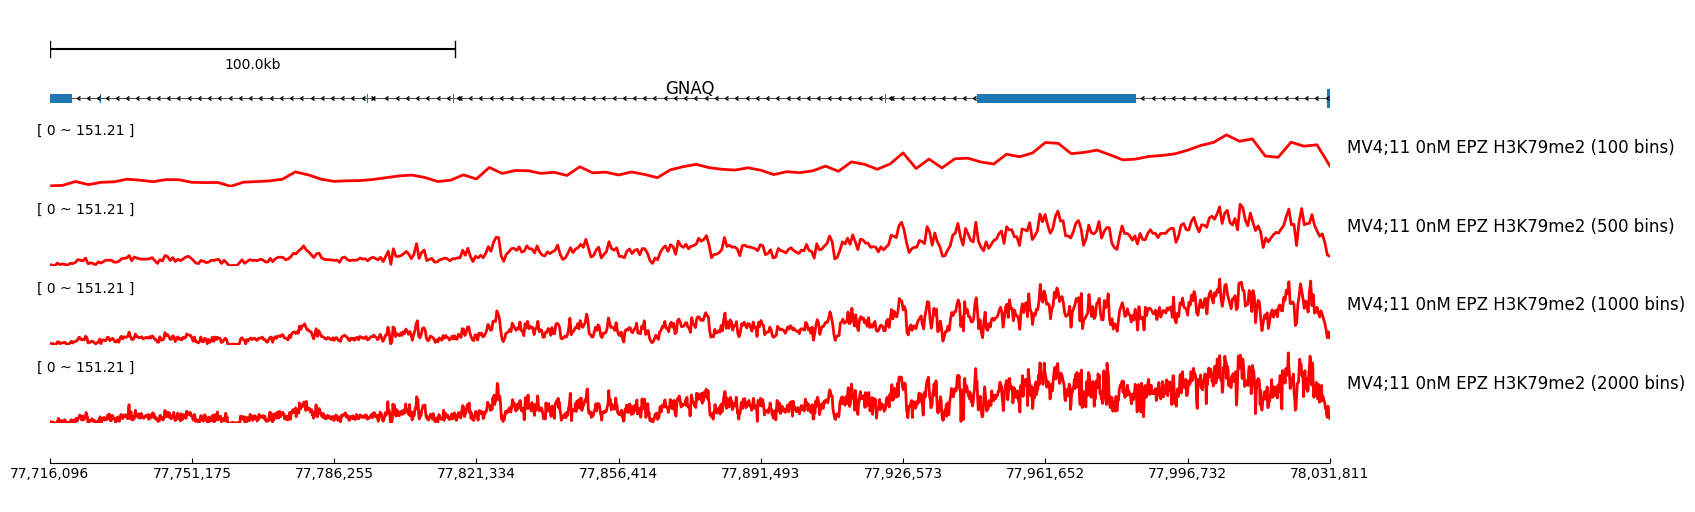

In [16]:
figure = pn.Figure(autospacing=True)
figure.add_track('scale')

figure.add_track('genes', 
                 file='hg38_genes.bed', 
                 gene_style="normal", # 'normal' or 'flybase' - I much prefer 'normal'
                 min_gene_length=int(1.2e5), # Minimum gene length to plot, useful to filter out small genes that often clutter the plot
                 height=0.5, # Height of the track - setting this to 0.5 makes the gene track look nicer
                 label_y_offset=-50,
                 label_loc="mid",
                 arrow_color="black")


# Use the same bigwig but change the number of bins
number_of_bins = [100, 500, 1000, 2000]

for nbins in number_of_bins:

    figure.add_track('bigwig', 
                     file='https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4110nMH3K79me2_bigWig.bigWig', 
                     title=f'MV4;11 0nM EPZ H3K79me2 ({nbins} bins)', 
                     style='line', 
                     color='red', 
                     autoscale_group='H3K79me2', 
                     min_value=0,
                     data_range_style='text', 
                     number_of_bins=nbins, # Set the number of bins
                     )

figure.add_track('xaxis')
figure.plot_gene('GNAQ', genome='hg38')